In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
# iris 데이터셋 로드
iris = load_iris()

In [5]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [7]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [9]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df_iris['target'] = target

In [12]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

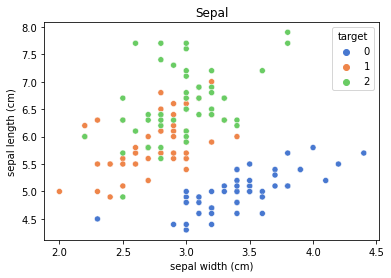

In [14]:
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target')
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='brg')
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.title('Sepal')
plt.show()
#'petal length (cm)', 'petal width (cm)',

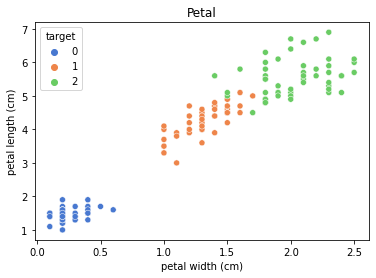

In [15]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.title('Petal')
plt.show()

### 데이터 불균형 확인 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_iris.drop('target', axis=1)

In [19]:
y = df_iris['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

<AxesSubplot:xlabel='target', ylabel='count'>

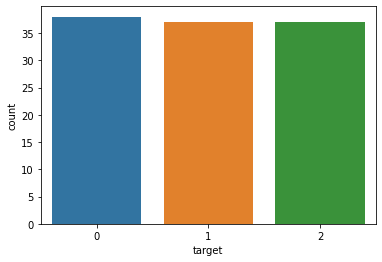

In [26]:
sns.countplot(y_train)

In [27]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [28]:
X_test.shape, y_test.shape

((38, 4), (38,))

# 지도학습 알고리즘 이해 및 실습

In [29]:
from sklearn.linear_model import LogisticRegression

### step1 모델 선언

In [30]:
model_lr = LogisticRegression()

### step2 모델 학습

In [31]:
model_lr.fit(X_train, y_train)

LogisticRegression()

### step3 예측

In [32]:
pred_lr = model_lr.predict(X_test)

In [33]:
pred_lr[:5]

array([1, 1, 2, 2, 2])

### step4 평가

In [34]:
(pred_lr == y_test).mean()

1.0

In [50]:
# 모델 생성
import pickle
pickle.dump(model_lr, open('iris_model_lr.pkl', 'wb'))

## 서포트 벡터 머신 (SVM; Support Vector Machine)
- (SVC; Support Vector Classifier)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
- 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

In [35]:
from sklearn.svm import SVC

In [36]:
model_svc = SVC(kernel="linear", C=10)
model_svc

SVC(C=10, kernel='linear')

In [37]:
model_svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [38]:
pred_svc = model_svc.predict(X_test)

In [39]:
pred_svc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [40]:
(pred_svc == y_test).mean()

1.0

In [41]:
pred_svc[:5]

array([1, 1, 2, 2, 2])

각 클래스(target 값)에 대한 확률값을 return 해주는 decision_function()

In [43]:
# 클래스를 분류한 확률 정보 확인
model_svc.decision_function(X_test)[:5]

array([[-0.23926426,  2.28023685,  0.75592725],
       [-0.23873309,  2.25788457,  0.84262294],
       [-0.2664893 ,  1.18041355,  2.24577395],
       [-0.27962692,  1.18000795,  2.26709796],
       [-0.27749846,  0.83443234,  2.28541916]])

In [49]:
# 모델 생성하기
pickle.dump(model_svc, open('iris_model_svc.pkl', 'wb'))